## Guided Project: Clean And Analyze Employee Exit Surveys ##

*** Questions to Answer in the Data ***
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In [214]:
import pandas as pd # import Pandas library
import numpy as np # import Numpy library
import seaborn as sns # import Seaborn
import matplotlib.pyplot as plt # import Matplotlib

In [215]:
# enable Matplotlib
%matplotlib inline 

In [216]:
# read CSV's into dataframes
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [217]:
# get information on each dataframe
dete_survey.info() # I see many null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [218]:
# get information on the datframe
tafe_survey.info() # I see many null values.  this dataframe has lots of questions on it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [219]:
# inspect a few rows of the dataframe
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [220]:
# inspect a few rows of the dataframe
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [221]:
# inspect the datframe sizes in rows and columns
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


In [222]:
# look for nulls
print(dete_survey.isnull().sum())
print('\n'*2)
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [223]:
# perform value counts on resignation reason in each dataframe
print(dete_survey['SeparationType'].value_counts())
print('\n'*2)
print(tafe_survey['Reason for ceasing employment'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64



Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64


*** Observations from Data Inspection ***
One data set has nine reasons for termination whereas the other has six reasons.   I looks like one of the keys to analyzing the data will be to correctly combine them and identify the key attributes needed to answer the questions in this project. Common areas of possible joins are on employment start date, employment end date, age, and reason for termination.

From our work looking at the data, we can first make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [224]:
# Read the date_survey.csv file in again and set the NaN values as Not Stated.
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [225]:
# drop columns 28-48 from the dete_survey dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [226]:
# drop columsn 17-95 from the tafe_survey dataframe
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

** In the above two cells I dropped columns which were not needed for the analysis and created two new datframes to work with.**

In [227]:
# Let's start to look and update column names so we can combine dataframes
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [228]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [229]:
dete_survey_updated.columns # results look good

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [230]:
tafe_survey_updated = tafe_survey_updated.rename(columns= {
    'Record ID' : 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment' : 'separationtype',
    'Gender. What is your Gender?' : 'gender',
    'CurrentAge. Current Age' : 'age',
    'Employment Type. Employment Type' : 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

** I updated the columns in the prior cells so that I can merge the dateframes together. **

In [231]:
# let's look at the value counts in the separationtype column
dete = 'DETE_Survey'
tafe = 'TAFE Survey'
print(dete)
print(dete_survey_updated['separationtype'].value_counts())
print('\n'*1)
print(tafe)
print(tafe_survey_updated['separationtype'].value_counts())
tafe_survey_updated.head(2)

DETE_Survey
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE Survey
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,position,Classification. Classification,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


** Since we are only analyzing resignations I will drop the other data from the dataframes so we can focus on that to get our answers to the questions **

In [232]:
# inspect some values of the separationtype column
print(dete_survey_updated['separationtype'].head())
# create a Regex pattern to index the dataframe on only Resignation separationtype
# note this dataframe has three versions of resignation and I wish to bring them all over
pattern = r"[Rr]esignation"
# this creates a boolean argument which I can pass to index the dataframe on resignation
inspect = dete_survey_updated['separationtype'].str.contains(pattern, na=False)
# na=False parameter will change any null value to False
inspect.head()

0               Ill Health Retirement
1    Voluntary Early Retirement (VER)
2    Voluntary Early Retirement (VER)
3           Resignation-Other reasons
4                      Age Retirement
Name: separationtype, dtype: object


0    False
1    False
2    False
3     True
4    False
Name: separationtype, dtype: bool

In [233]:
# index the dataframe by passing the boolean series and store into new dataframe
dete_resignations = dete_survey_updated[inspect]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [234]:
# there is only one value for resignation in the other dataframe
# I will filter the dataframe through using a create a boolean argument
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,position,Classification. Classification,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


** In the last few cells I filtered the dataframes to only those exit surveys where the employee resigned.  This subset of data is what is truly needed to answer the questions of this analysis **

In [235]:
# let's inspect the cease_date column
print(dete_resignations['cease_date'].value_counts())
# I need to clean this column and only show the year
dete_resignations.head()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [236]:
# dete_resignations['cease_date'] = dete_resignations['cease_date']
# on step
year_pattern =r"([1-2][0-9]{3})" # short way with repeating
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern).astype('float')
dete_resignations.head()



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [237]:
# let's inspect to see if the change happened as planned
dete_resignations['cease_date'].value_counts() # updated year looks good

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [238]:
print(dete_resignations['dete_start_date'].value_counts(ascending=True))

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64


In [239]:
print(tafe_resignations['cease_date'].value_counts(ascending=True))

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64


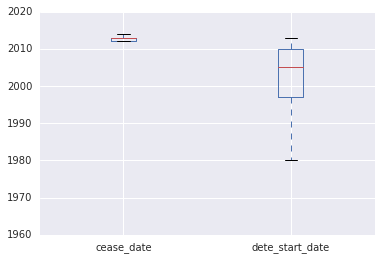

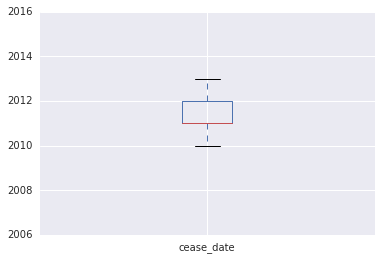

In [240]:
# create boxplot of the date columns in dete_resignations
num_cols = ['cease_date', 'dete_start_date']
boxplot = dete_resignations.boxplot(column=['cease_date', 'dete_start_date'])
plt.show()
# create boxplot of the date columns in tafe_resignations
boxplot1 = tafe_resignations.boxplot(column=['cease_date'])
boxplot1.set_ylim(2006, 2016)
plt.show()


In [241]:
num_check = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
num_check.value_counts(ascending=True)

31.0     1
49.0     1
34.0     1
38.0     1
35.0     1
41.0     1
27.0     1
42.0     1
33.0     1
29.0     1
36.0     2
30.0     2
25.0     2
26.0     2
28.0     2
32.0     3
21.0     3
19.0     3
39.0     3
24.0     4
11.0     4
23.0     4
18.0     5
16.0     5
12.0     6
17.0     6
14.0     6
22.0     6
10.0     6
15.0     7
20.0     7
8.0      8
13.0     8
7.0     13
2.0     14
9.0     14
4.0     16
6.0     17
0.0     20
3.0     20
1.0     22
5.0     23
dtype: int64

** In the above few cells I wanted to see if ther were any issues with dates.  The boxplots help to visualize the data along with the mean and quartiles. I checked also to see if there were any negative numbers in the formula above where I subtracted cease_date from dete_start_date.  If there were, that would indicate a data issue with the dates.  I did not find any of them. **

In [242]:
# Let's see if can calculate a years of service in dete_resignations
dete_resignations.head()
# yes we can use (cease_date - dete_start_date) to calculate years of service

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [243]:
# create a new column call institute_service in the dataframe
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [244]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


** Looking at the dataset I see it is possible to calculate a years of service (institute_service) by taking (cease_date - dete_start_date) as a formula.  I added a new column in the dataframe and performed that function.   This piece of data is crticial to our ability to answer the questions presented in this analysis **

In [245]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [246]:
# write a function that returns False, True or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [247]:
# use df.applymap() to pass in the function over the columns in the dataframe
# return a true or false parameter
# use df.any() so that any True along the axis returns a True in the new column
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
# use the df.copy() command to copy into a new dataframe
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [248]:
# since all of these columns are already in a true/false format, use df.any() so that 
# anywhere there is a True value along the axis it will update the new column as True
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
# use the df.copy() command to copy into a new datframe
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



** In the tafe_resignations dataframe, it was determined that only two columns indicated that an employee was dissatisfied and resigned for those reasons.  In the dete_resignations dataframe there were nine reasons which were identified as dissatisfied.  I looked at anytime one of those reasons was true in the data set, created a new column, 'dissatisfied', and indicated a True/False value whether the person was indeed dissatisfied. ** 


In [249]:
# create new columns in each dataframew with the source prior to combining
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [250]:
# combine the dataframes using df.concat() and ignore the indext
combined=pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [251]:
# we no longer need a lot of the data to perform our analysis
# I dropped any columns which had over 500 null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

** I added a column to each dataframe indicating the source of the data as a step prior to combining.  I then combined the two datfames by the columns which we had cleaned up earlier in this project.  Lastly, I removed any column with more than 500 null values from the dataframe.   The reason is that we have what we need to answer the questions and there was still much extra data which I wanted to clean up to make the analysis easier. **

In [252]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [253]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")
print(combined_updated["institute_service"].value_counts(dropna=False))
print(combined_updated["institute_service_up"].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [254]:
# write a function that categories the years of service of employees
# into logical buckets for comparison
def service_cats(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [255]:
# create a new column and pass the function using df.apply()
# to create employee groupings by years of service
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service_cats)
combined_updated['service_cat'].head()

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object

** I took the institute_service column and placed the employess into logical buckets based on their tenure.  This will help us analyze the employees towards making decisions about newer versus more experienced associates.  We can then dig further into the resignation numbers. **
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

We refereneced the following article to make this determination.  <link> https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage<link>

In [256]:
# tally up the number of true or false in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [257]:
# as False is the most commmon value, I am filling null values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


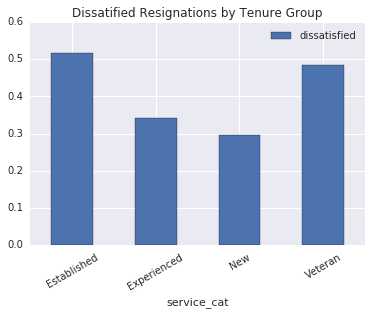

In [258]:
# create pivot table showing dissatified percentage by tenure group
pivot=combined_updated.pivot_table(values='dissatisfied', index='service_cat')
print(pivot)
# plot pivot table aa a bar chart
pivot.plot(kind='bar', rot=30, title="Dissatified Resignations by Tenure Group")

** Answers to the Original Questions in this Project Regarding Tenure **

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? The data shows that 30% of the newer employees are resigning due to satisfaction.
- What about employees who have been there longer? Employees who have been here longer than the new associates are dissatisfied at a higher rate.
- Are younger employees resigning due to some kind of dissatisfaction? 
- What about older employees?

In [259]:
combined_updated.columns
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [260]:
# define a function that groups associates by age brackets
def age_cats(val):
    if val >= 60:
        return "Sixties"
    elif 50 <= val < 59:
        return "Fifties"
    elif 40 <= val < 49:
        return "Forties"
    elif 30 <= val < 39:
        return "Thirties"
    elif pd.isnull(val):
        return np.nan
    else:
        return "Twenties"

In [261]:
combined_updated['age_updated']=combined_updated['age'].astype(str).str.extract(r"(\d+)")
combined_updated['age_updated']=combined_updated['age_updated'].astype(float)
combined_updated['age_updated'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_updated, dtype: int64

In [262]:
# this categorizes by age bracket in a new column
combined_updated['age_cats']=combined_updated['age_updated'].apply(age_cats)
combined_updated['age_cats'].value_counts(dropna=False)

Forties     174
Twenties    139
Thirties    134
Fifties     126
NaN          55
Sixties      23
Name: age_cats, dtype: int64

          dissatisfied
age_cats              
Fifties       0.404762
Forties       0.379310
Sixties       0.521739
Thirties      0.358209
Twenties      0.352518


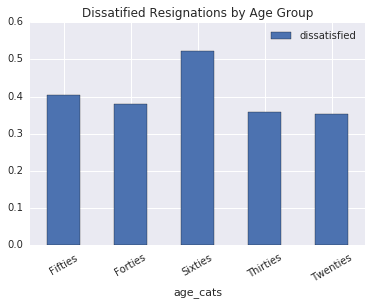

In [263]:
# create pivot table showing dissatified percentage by age group
pivot=combined_updated.pivot_table(values='dissatisfied', index='age_cats')
print(pivot)
# plot pivot table aa a bar chart
pivot.plot(kind='bar', rot=30, title="Dissatified Resignations by Age Group")

** Answers to the Original Questions in this Project Regarding Age **
- Are younger employees resigning due to some kind of dissatisfaction? No, the youngest age group is disatisfied at the lowest rate.   
- What about older employees? The group in their sixties had the highest dissatisfaction.